In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import cv2
import PIL
import time
from skimage import color
import os.path
from PIL import Image, ImageOps

In [2]:
cwd = os.getcwd()
# os.listdir(cwd)

In [3]:
training_paths = ["./train_tumor/Tumor/", "./train_tumor2/NoTumor/"]
test_paths = ["./test_tumor/Tumor/", "./test_tumor2/NoTumor/"]

In [4]:
# Resizing an saving the training images in same folder with same file name

for path in training_paths:
    for img_name in os.listdir(path):
        f_img = path+img_name
        img = Image.open(f_img)
        #img_gray = img.convert('L')
        img_gray = ImageOps.grayscale(img)
        try:
            img_gray = img_gray.resize((300,300), PIL.Image.ANTIALIAS)
            img_gray.save(f_img, quality=95)
        except ValueError:
            print("There is something wrong")

In [5]:
# Resizing an saving the test images in same folder with same file name

for path in test_paths:
    for img_name in os.listdir(path):
        f_img = path+img_name
        img = Image.open(f_img)
        #img_gray = img.convert('L')
        img_gray = ImageOps.grayscale(img)
        try:
            img_gray = img_gray.resize((300,300), PIL.Image.ANTIALIAS)
            img_gray.save(f_img, quality=95)
        except ValueError:
            print("There is something wrong")

In [6]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("train_tumor2",
                                          target_size=(300,300),
                                          batch_size = 32,
                                          class_mode = 'binary', color_mode="grayscale")

test_dataset = test.flow_from_directory("test_tumor2",
                                          target_size=(300,300),
                                          batch_size =32,
                                          class_mode = 'binary', color_mode="grayscale")

Found 88 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [7]:
test_dataset.class_indices

{'NoTumor': 0, 'Tumor': 1}

In [8]:
train_dataset.class_indices

{'NoTumor': 0, 'Tumor': 1}

In [9]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(300,300,1)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#steps_per_epoch = train_imagesize/batch_size

start = time.time()

model.fit(train_dataset,
         epochs = 30, batch_size=10,
         validation_data = 0.0  
         )

end = time.time()
print(end - start)

In [11]:
#steps_per_epoch = train_imagesize/batch_size
result = 0
model_300 = []
start = time.time()
for i in range(3):
    model.fit(train_dataset,
             epochs = 5, batch_size=10,
             validation_data = 0.0  
             )
    result = model.evaluate(test_dataset)
    model_300.append(result[1])
end = time.time()
print(end - start)

Epoch 1/5
3/3 [==============================] - 6s 2s/step - loss: 0.6616 - accuracy: 0.5682
Epoch 2/5
3/3 [==============================] - 5s 1s/step - loss: 0.5140 - accuracy: 0.8182
Epoch 3/5
3/3 [==============================] - 5s 1s/step - loss: 0.3517 - accuracy: 0.8977
Epoch 4/5
3/3 [==============================] - 5s 1s/step - loss: 0.2662 - accuracy: 0.8977
Epoch 5/5
1/1 [==============================] - 0s 447ms/step - loss: 0.2409 - accuracy: 0.9091
Epoch 1/5
3/3 [==============================] - 5s 1s/step - loss: 0.1638 - accuracy: 0.9659
Epoch 2/5
3/3 [==============================] - 5s 1s/step - loss: 0.1320 - accuracy: 0.9432
Epoch 3/5
3/3 [==============================] - 5s 1s/step - loss: 0.1018 - accuracy: 0.9545
Epoch 4/5
3/3 [==============================] - 5s 1s/step - loss: 0.0403 - accuracy: 0.9886
Epoch 5/5
1/1 [==============================] - 0s 320ms/step - loss: 0.0444 - accuracy: 1.0000
Epoch 1/5
3/3 [==============================] - 5s 2s

In [ ]:
model.evaluate(test_dataset)

In [12]:
print(model_300)
print(np.mean(model_300))

[0.9090909361839294, 1.0, 1.0]
0.9696969787279764


In [26]:
# Saving model file
import pickle
pickle.dump(result, open('model.pkl', 'wb'))

In [27]:
# Loading model file again
with open('model.pkl', 'rb') as file:
    pickle_model = pickle.load(file)

In [28]:
# Inspecting model file
print(type(pickle_model))
print(pickle_model)

<class 'list'>


In [14]:
# Predicting single image
from skimage import transform
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (300, 300, 1))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load('./test_tumor4/Tumor/Tr-me_0076.jpg')
model.predict(image)

array([[0.999997]], dtype=float32)

In [15]:
# Predicting single image
from skimage import transform
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (300, 300, 1))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load('./test_tumor4/NoTumor/Tr-no_0054.jpg')
model.predict(image)

array([[2.5602723e-29]], dtype=float32)

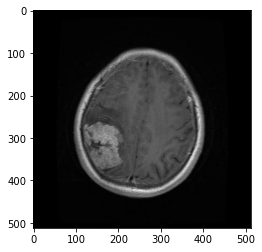

In [16]:
dd = os.listdir("./train_tumor4/Tumor/")
rgb = plt.imread('./train_tumor4/Tumor/Tr-me_0010.jpg')
plt.imshow(rgb)

In [17]:
"""

#steps_per_epoch = train_imagesize/batch_size

model.fit_generator(train_dataset,
         steps_per_epoch = 250,
         epochs = 10,
         validation_data = test_dataset
       
         )
         
"""

'\n\n#steps_per_epoch = train_imagesize/batch_size\n\nmodel.fit_generator(train_dataset,\n         steps_per_epoch = 250,\n         epochs = 10,\n         validation_data = test_dataset\n       \n         )\n         \n'

In [18]:
"""

# Manually Predicting 
test_path = '../test_tumor'
Tumor=0
NoTumor=0
for i in os.listdir(test_path):
    img = image.load_img(test_path + "//" +i, target_size=(512,512,3))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        NoTumor +=1
        print('NoTumor')
    else:
        Tumor +=1
        print('Tumor')
print(f'Tumor: {Tumor}, NoTumor: {NoTumor}')


"""

'\n\n# Manually Predicting \ntest_path = \'../test_tumor\'\nTumor=0\nNoTumor=0\nfor i in os.listdir(test_path):\n    img = image.load_img(test_path + "//" +i, target_size=(512,512,3))\n    plt.imshow(img)\n    plt.show()\n    X = image.img_to_array(img)\n    X = np.expand_dims(X, axis=0)\n    images = np.vstack([X])\n    val = model.predict(images)\n    if val == 0:\n        NoTumor +=1\n        print(\'NoTumor\')\n    else:\n        Tumor +=1\n        print(\'Tumor\')\nprint(f\'Tumor: {Tumor}, NoTumor: {NoTumor}\')\n\n\n'

In [19]:
"""

def predictImage(filename):
    img1 = image.load_img(filename,target_size=(224,224))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Duck",fontsize=20)
        
    
    elif val == 0:
        
        plt.xlabel("Bird",fontsize=20)


"""

'\n\ndef predictImage(filename):\n    img1 = image.load_img(filename,target_size=(224,224))\n    \n    plt.imshow(img1)\n \n    Y = image.img_to_array(img1)\n    \n    X = np.expand_dims(Y,axis=0)\n    val = model.predict(X)\n    print(val)\n    if val == 1:\n        \n        plt.xlabel("Duck",fontsize=20)\n        \n    \n    elif val == 0:\n        \n        plt.xlabel("Bird",fontsize=20)\n\n\n'